# Your first ML Algorithm
Logistic Regression Project - Banking Marketing Campaign



In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # makes it so we can see all columns


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=413&path=bank-marketing-campaign-data.csv', sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Inspect Data before Analyzing

In [3]:
# how many rows / columns
df.shape

(41188, 21)

In [4]:
# statistical summary of dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# summary of structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# how many yes and no
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [7]:
# percentage of yes and no
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [8]:
# how many missing values. None
df.isna().sum().sum()

np.int64(0)

In [9]:
# from the y column, summary of who said no
df[df['y']=='no'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# from the y column, summary of who said yes
df[df['y']=='yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# drop 'y' column so this will not mess with our analysis.  axis=1 drop the column named 'y'
# df = df.drop('y', axis=1)

## LET'S EXPLORE OUR DATA NOW

In [12]:
# how many times each unique values appear in the 'previous' column
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [13]:
# how many people were contacted in the previous company and what was the outcome
df.groupby('previous')['poutcome'].value_counts()

previous  poutcome   
0         nonexistent    35563
1         failure         3696
          success          865
2         failure          434
          success          320
3         success          128
          failure           88
4         success           40
          failure           30
5         success           15
          failure            3
6         success            4
          failure            1
7         success            1
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='duration'>

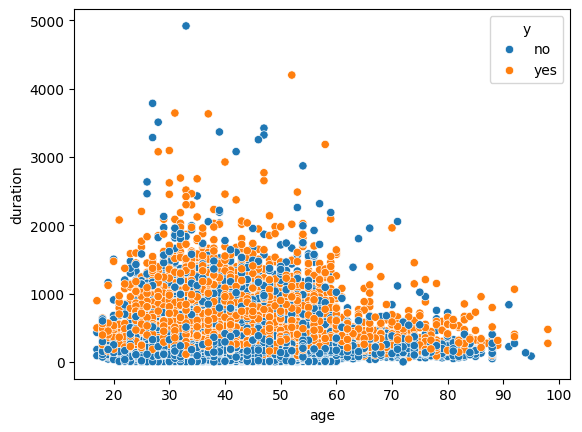

In [14]:
# people who say yes tend to be on the phone a lot longer
sns.scatterplot(data=df, x='age', y='duration', hue='y')

In [15]:
# looks like customers who were contacted between 2-4 times (in previous campaign) had a success rate of approx 40%
df.groupby('previous')['poutcome'].value_counts(normalize=True)

previous  poutcome   
0         nonexistent    1.000000
1         failure        0.810349
          success        0.189651
2         failure        0.575597
          success        0.424403
3         success        0.592593
          failure        0.407407
4         success        0.571429
          failure        0.428571
5         success        0.833333
          failure        0.166667
6         success        0.800000
          failure        0.200000
7         success        1.000000
Name: proportion, dtype: float64

In [16]:
# breakdownof previous outcome
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

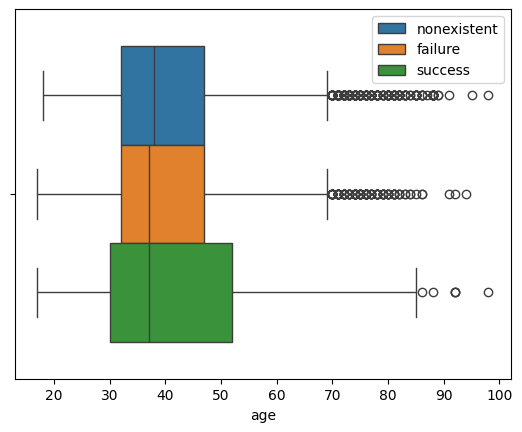

In [17]:
# look at age against the previous outcome.  keep?  keep age is 50/50
sns.boxplot(data=df, x='age', hue='poutcome')
plt.legend(loc='upper right')

<Axes: xlabel='age', ylabel='Probability'>

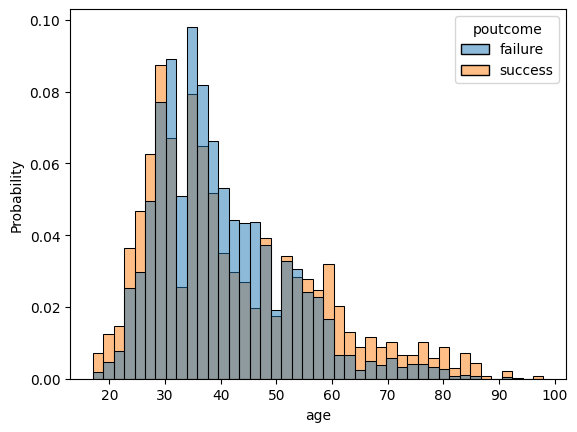

In [18]:
sns.histplot(data=df[df['poutcome']!='nonexistent'], x='age', hue='poutcome', stat='probability', common_norm=False)

In [19]:
# education - people with a university degree have a higher outcome of success
df[df['poutcome']!='nonexistent'].groupby('poutcome')['education'].value_counts(normalize=True)

poutcome  education          
failure   university.degree      0.292098
          high.school            0.263170
          basic.9y               0.148166
          professional.course    0.118297
          basic.4y               0.083255
          basic.6y               0.051270
          unknown                0.043509
          illiterate             0.000235
success   university.degree      0.388201
          high.school            0.214130
          professional.course    0.133285
          basic.4y               0.091770
          basic.9y               0.080845
          unknown                0.061908
          basic.6y               0.029133
          illiterate             0.000728
Name: proportion, dtype: float64

In [20]:
# having a university degree seems to be associated with a higher rate of success, but we need to do more hypothesis testing to be sure
df.groupby('education')['y'].value_counts(normalize=True)

education            y  
basic.4y             no     0.897510
                     yes    0.102490
basic.6y             no     0.917976
                     yes    0.082024
basic.9y             no     0.921754
                     yes    0.078246
high.school          no     0.891645
                     yes    0.108355
illiterate           no     0.777778
                     yes    0.222222
professional.course  no     0.886515
                     yes    0.113485
university.degree    no     0.862755
                     yes    0.137245
unknown              no     0.854997
                     yes    0.145003
Name: proportion, dtype: float64

In [21]:
# create a variable based on if they had a degree as that is a deciding factor.  Keep new variable
df['college_grad?'] = df['education'].apply(lambda x: x == 'university.degree')

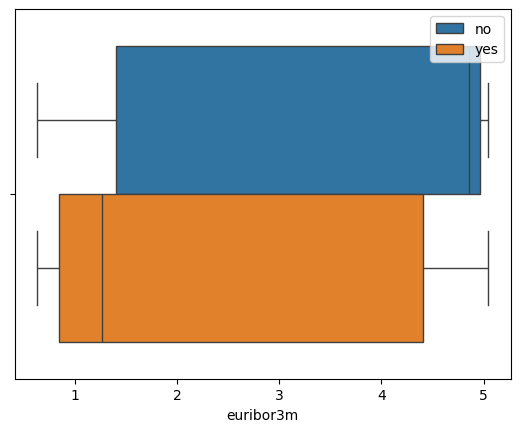

In [22]:
sns.boxplot(data=df, x='euribor3m', hue='y')
plt.legend(loc='upper right')

<Axes: xlabel='euribor3m', ylabel='Probability'>

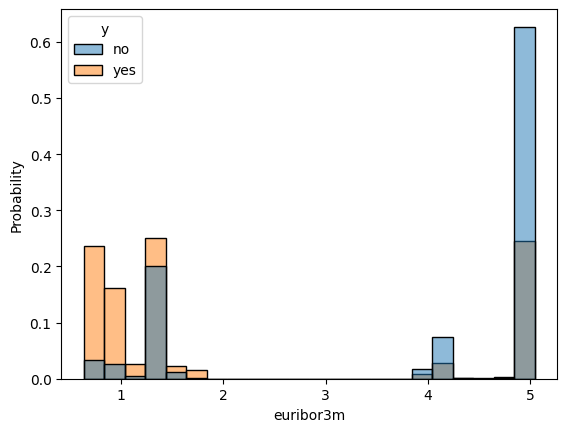

In [23]:
# the lower the interest rate, the more likely we get a yes
# the higher interest rate tends to be associated with recession, the lower the interest rate tent to be associated with growth periods
sns.histplot(data=df, x='euribor3m', hue='y', common_norm=False, stat='probability')

In [24]:
# creating a new variable for a new column based on interest rates below 3% - keep new variable
df['low_interest_rates'] = df['euribor3m'].apply(lambda x: x < 3)

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,college_grad?,low_interest_rates
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False


In [26]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

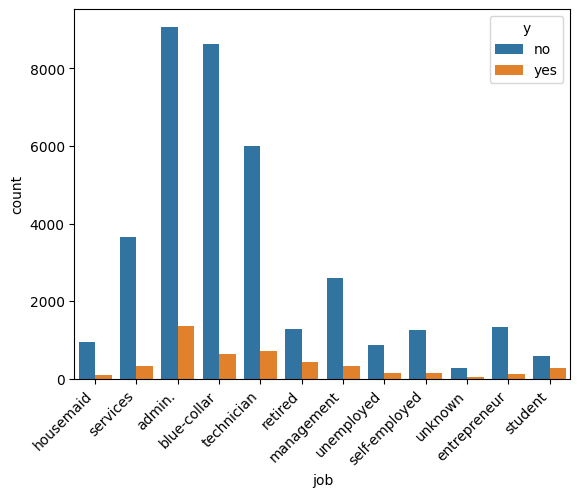

In [27]:
sns.countplot(data=df, x='job', hue='y')

plt.xticks(rotation=45, ha='right') # turns the job names 45 degrees for easy readability, ha lines them up to the right neatly
plt.tight_layout # makes it so job titles dont get cut off


In [28]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

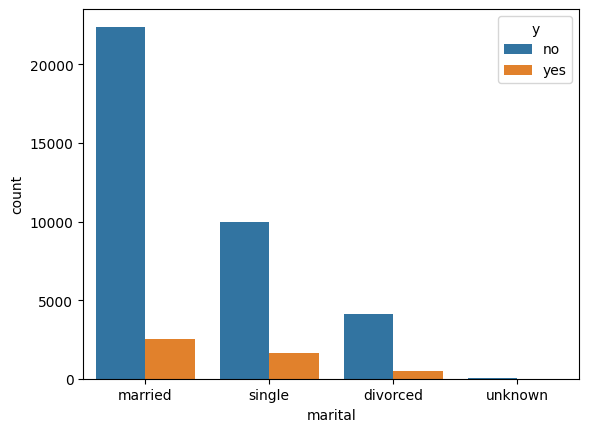

In [29]:
sns.countplot(data=df, x='marital', hue='y')

In [30]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [31]:
# create new variable simplifying info so we know if they (0) had not been contacted or (1) if they have been contacted
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

<Axes: xlabel='contacted_before', ylabel='count'>

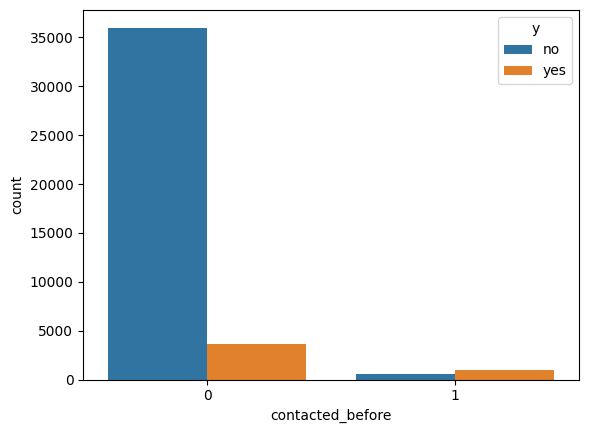

In [32]:
sns.countplot(data=df, x='contacted_before', hue='y')

In [33]:
df['campaign'].value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64

(0.0, 25.0)

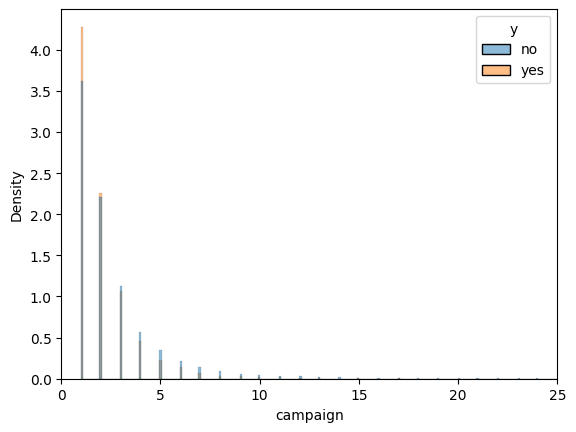

In [36]:
# after 25 yu can not really see anything as it becomes so low, past that is the outliers it seems
sns.histplot(data
=df, x='campaign', hue='y', stat='density', common_norm=False)
plt.xlim(0, 25)

In [37]:
df['cons.price.idx'].value_counts()

cons.price.idx
93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

<Axes: xlabel='cons.price.idx', ylabel='Density'>

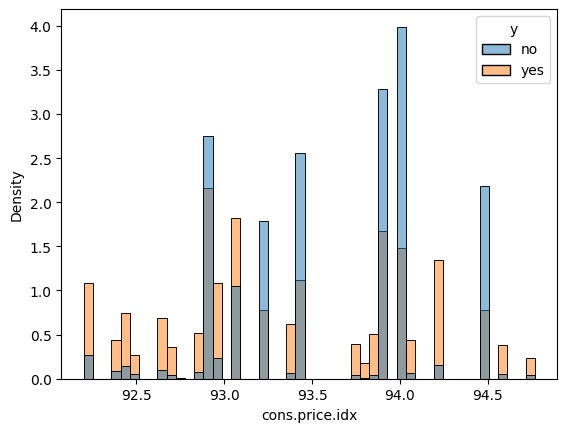

In [38]:
sns.histplot(data=df, x='cons.price.idx', hue='y', stat='density', common_norm=False)

In [40]:
df['nr.employed'].value_counts()

nr.employed
5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

<Axes: xlabel='nr.employed', ylabel='Density'>

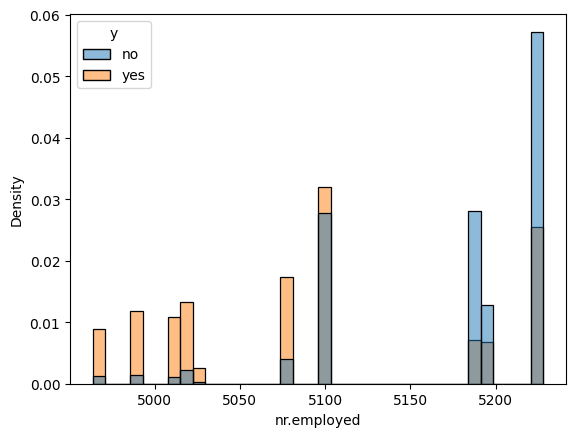

In [ ]:
# when employment drops, people tend to say no as they dont have jobs
sns.histplot(data=df, x='nr.employed', hue='y', stat='density', common_norm=False)

## NOW WE MUST CREATE OUR TRAINING AND TESTING DATASETS (TO PREDICT 'y')

In [42]:
# is duration concidered 'leakage' as this almost tells us if the call was long, we might have a yes.  I did not include
include_list = ['job', 'age', 'college_grad?', 'housing', 'loan', 'campaign', 'previous', 'marital', 'education', 'contact', 'month', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contacted_before']

In [ ]:
# imports what we need to run train and test splits
from sklearn.model_selection import train_test_split

In [44]:
# define our variables for training and testing
X = df[include_list]
y = df['y']

In [45]:
X.head()

,job,age,college_grad?,housing,loan,campaign,previous,marital,education,contact,month,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contacted_before
0,housemaid,56,False,no,no,1,0,married,basic.4y,telephone,may,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,services,57,False,no,no,1,0,married,high.school,telephone,may,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,services,37,False,yes,no,1,0,married,high.school,telephone,may,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,admin.,40,False,no,no,1,0,married,basic.6y,telephone,may,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,services,56,False,no,yes,1,0,married,high.school,telephone,may,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [46]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [47]:
X_dummies = pd.get_dummies(X, drop_first=True)

In [ ]:
# random state ensures the same split happens every time you run the code.
# telling our train and test splits what are inputs are and what your target is
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=101)

Size of our training and testing sets

In [49]:
X_train.shape

(30891, 47)

In [50]:
y_train.shape

(30891,)

In [51]:
X_test.shape

(10297, 47)

In [52]:
y_test.shape

(10297,)

## LET'S BUILD A MODEL - LOGISTICAL ALGORITHM

In [53]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# max_iter tells the model how many iterations it is allowed to use to converge, without telling it how many times it will do 100
# variable to execute our LogisticRegression
logreg_model = LogisticRegression(max_iter=10000)

# finds the best coefficients (weights) for each feature, 'fit' our training models
# the model has learned patterns linking X_train → y_train and is ready to make predictions
logreg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


## EVALUATION
1. Make predictions on the training set
2. Evaluate those train-set predictions
3. Make predictions on the testing set
4. Evaluate those test-set predictions

In [57]:
train_preds = logreg_model.predict(X_train)

test_preds = logreg_model.predict(X_test)

In [58]:
len(train_preds[train_preds=='yes'])

1192

In [59]:
len(train_preds[train_preds=='no'])

29699

## EVALUATION METRICS INCLUDE:
1. Accuracy
2. Confusion matrix methods

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## TRAINING DATA

In [62]:
print('Training Prediction Accuracy:')
print(accuracy_score(y_true = y_train, y_pred = train_preds))

print('\nConfusion Matrix:')
print(confusion_matrix(y_true = y_train, y_pred = train_preds))

print('\nClassification Report:')
print(classification_report(y_true = y_train, y_pred = train_preds))

Training Prediction Accuracy:
0.9006506749538701

Confusion Matrix:
[[27023   393]
 [ 2676   799]]

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     27416
         yes       0.67      0.23      0.34      3475

    accuracy                           0.90     30891
   macro avg       0.79      0.61      0.64     30891
weighted avg       0.88      0.90      0.88     30891



## TEST DATA

In [63]:
print('Training Prediction Accuracy:')
print(accuracy_score(y_true = y_test, y_pred = test_preds))

print('\nConfusion Matrix:')
print(confusion_matrix(y_true = y_test, y_pred = test_preds))

print('\nClassification Report:')
print(classification_report(y_true = y_test, y_pred = test_preds))

Training Prediction Accuracy:
0.8988054773234923

Confusion Matrix:
[[9019  113]
 [ 929  236]]

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      9132
         yes       0.68      0.20      0.31      1165

    accuracy                           0.90     10297
   macro avg       0.79      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



## Keeping both our engineered and original data for education and euribor3m I was able to get the 'yes'on 
## 'precision' from .67 to .68 which is slightly higher.  Everything else looked the same pretty much, so I kept both
## In my opinion 'duration' was data leakagae to the yes, so I excluded.